In [157]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


**Exploratory data anlysis**

In [158]:
df=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
df.dtypes

movieid                  object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object

In [159]:
df.head()
#moveid,title,ratingContents,genre,originalLanguage(112 diff languages),distributor(3694 distinct values),director(62208 people),soundType(551)-text
#rating-10 unique values(categorical variable)
#releasedatetheaters,releaseDateStreaming-date
#runtimeMinutes,audienceScore
#boxOffice-amount collected ....should be converted to float



,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


Checking the which categorical variables are suitable for onehotencoding

In [160]:
df.nunique()

movieid                 126404
title                   126404
audienceScore              101
rating                      10
ratingContents            8353
releaseDateTheaters      12062
releaseDateStreaming      4726
runtimeMinutes             324
genre                     2912
originalLanguage           112
director                 62208
boxOffice                 4863
distributor               3694
soundType                  551
dtype: int64

In [161]:
df=df.drop(columns=['title'])

In [162]:
df['boxOffice']=df['boxOffice'].str.replace('$','').str.replace('M','')
df['boxOffice']=df['boxOffice'].str.replace('K','')
df['boxOffice']=df['boxOffice'].astype('float')
df_new=df[['audienceScore','runtimeMinutes','boxOffice']]


/tmp/ipykernel_28/2427826502.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['boxOffice']=df['boxOffice'].str.replace('$','').str.replace('M','')


In [163]:
df_new.describe()

,audienceScore,runtimeMinutes,boxOffice
count,73248.000000,129431.000000,14743.000000
mean,55.674967,93.708578,110.960842
std,24.553648,28.129175,186.776874
min,0.000000,1.000000,0.000000
25%,37.000000,84.000000,8.600000
50%,57.000000,92.000000,31.600000
75%,76.000000,103.000000,112.250000
max,100.000000,2700.000000,999.400000


In [164]:

test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [165]:
df=df.drop_duplicates()
train=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
train=train.drop_duplicates()#removing duplicates before join

Done an outer join with movies and train dataset based on the common column "movieid"

In [166]:
df4=pd.merge(df,train,on='movieid',how='outer')
df4=df4.drop(columns=['movieid'])
p=pd.DataFrame()
p['reviewText']=train['movieid']+' '+train['reviewerName']+' '+train['reviewText']
p['sentiment']=train['sentiment']
X=p['reviewText'];y=p['sentiment']
p['reviewText']=p['reviewText'].fillna('')
#Removing the rows where the values of the target variable is missing
df5=df4.dropna(subset=['sentiment'],how='all')
df5['review_len']=[0 for i in range(307979)]

/tmp/ipykernel_28/1473574625.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['review_len']=[0 for i in range(307979)]


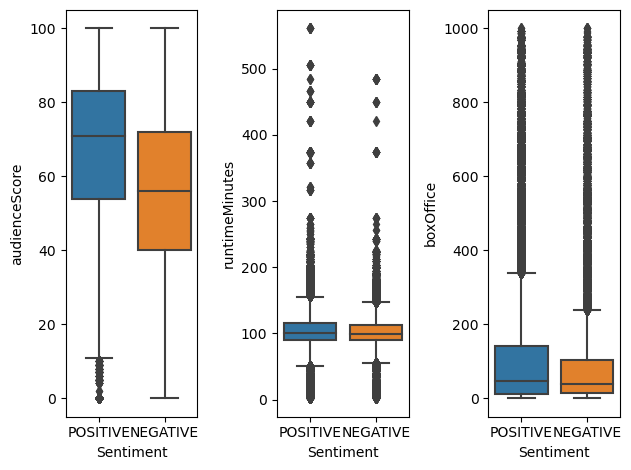

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
num_subplots = len(df_new.columns)

# Create subplots
for idx, i in enumerate(df_new.columns):
    plt.subplot(1, num_subplots, idx + 1)
    sns.boxplot(data=df5, x='sentiment', y=i)
    
    plt.xlabel('Sentiment')
    plt.ylabel(i)
# plt.title(f'Box Plot of {i} by Sentiment')
# Adjust layout to avoid overlapping of subplots
plt.tight_layout()

# Show the entire figure
plt.show()

<Axes: >

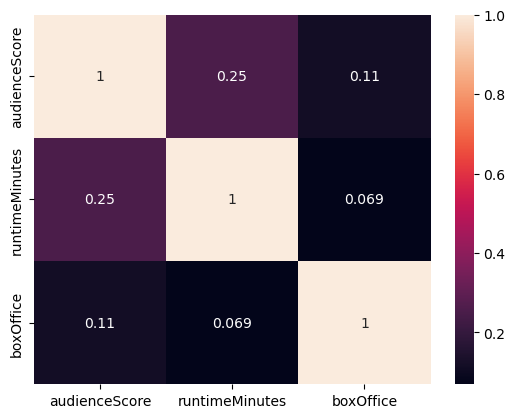

In [168]:
df5_n=df5[['audienceScore','runtimeMinutes','boxOffice']]
df5_cor=df5_n.corr()
sns.heatmap(data=df5_cor,annot=True)

**Feature Engineering**

In [169]:
def replace_with_length(df, source_column, target_column):
    for index, row in df.iterrows():
        if not pd.isnull(row[source_column]):
            text_length = len(str(row[source_column]))
            df.at[index, target_column] = text_length
        else:
            df.at[index, target_column] = None
replace_with_length(df5,'reviewText','review_len')
df5['review_len']=df5['review_len'].fillna(value=df5['review_len'].mean())

/tmp/ipykernel_28/3282269951.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['review_len']=df5['review_len'].fillna(value=df5['review_len'].mean())


In [170]:
df5['releaseDateTheaters'] = pd.to_datetime(df5['releaseDateTheaters'])
df5['releaseDateStreaming'] = pd.to_datetime(df5['releaseDateStreaming'])
df5['year_theaters'] = df5['releaseDateTheaters'].dt.year
df5['year_streaming'] = df5['releaseDateStreaming'].dt.year

/tmp/ipykernel_28/3929601264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['releaseDateTheaters'] = pd.to_datetime(df5['releaseDateTheaters'])
/tmp/ipykernel_28/3929601264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['releaseDateStreaming'] = pd.to_datetime(df5['releaseDateStreaming'])
/tmp/ipykernel_28/3929601264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

For audienceScore, runtimeMinutes there are many outliers which are are of positive sentiment but where as for boxOffice there are lot of ouliers in negative

In [171]:
import numpy as np
l=['audienceScore','runtimeMinutes','boxOffice']
df5=df5.drop(columns=['releaseDateTheaters','releaseDateStreaming'])

Performing one hot encoding

In [172]:
encoded_df = pd.get_dummies(df5['rating'],prefix='rating')
df6=df5.drop(columns=['rating'])
df6=pd.concat([df6,encoded_df],axis=1)

In [173]:
#columns which are having float datatype
columns1=['audienceScore','runtimeMinutes']

**PREPROCESSING**

Performing simpleimputer and standardScaler for imputing the missing values and normalizing the overall values

In [174]:
import numpy as np

from sklearn.preprocessing import StandardScaler
df6['audienceScore']=df6['audienceScore'].fillna(value=df6['audienceScore'].mean())
df6['runtimeMinutes']=df6['runtimeMinutes'].fillna(value=df6['runtimeMinutes'].mean())
#filling the missing values
sc=StandardScaler()
df6['audienceScore'].isna().sum()
sf7=sc.fit_transform(np.array(df6['audienceScore']).reshape(-1,1))
df6['audienceScore']=sf7
sf7=sc.fit_transform(np.array(df6['runtimeMinutes']).reshape(-1,1))
df6['runtimeMinutes']=sf7

USING PIPELINE AND COLUMNTRANSFORMER

In [175]:
#pipeline and column Transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
pipe=Pipeline([
    ('si',SimpleImputer(strategy='mean')),
    ('sc',StandardScaler()),
     
    
])
numeric_c='boxOffice'
col_t=ColumnTransformer(
    transformers=[
        ('num',pipe,[numeric_c])
    ],
    remainder='passthrough'
    
)
X_prepro=col_t.fit_transform(df6)
df7=pd.DataFrame(X_prepro)
df6['boxOffice']=df7[0]

removing the missing values in the text columns

In [176]:
df6[['ratingContents','genre','originalLanguage','director','distributor','soundType','reviewText']]=df6[['ratingContents','genre','originalLanguage','director','distributor','soundType','reviewText']].fillna('')

df6['total_text']=df6['ratingContents']+' '+df6['genre']+' '+df['originalLanguage']+' '+df6['director']+' '+df6['distributor']+' '+df6['soundType']+' '+df6['reviewText']

Converting text into vector using TfidfVectorizer

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=100)
df6['total_text']=df6['total_text'].fillna('')
tf2=TfidfVectorizer()

In [178]:
p=pd.DataFrame()
p['reviewText']=train['movieid']+' '+train['reviewerName']+' '+train['reviewText']
p['reviewText']=p['reviewText'].fillna(' ')
p['sentiment']=train['sentiment']
X=p['reviewText']
y=p['sentiment']
X_trans=tf2.fit_transform(X)
test1=pd.DataFrame()
test1['reviewText']=test['movieid']+' '+test['reviewerName']+' '+test['reviewText']
test1['reviewText']=test1['reviewText'].fillna('')
test1_trans=tf2.transform(test1['reviewText'])

In [179]:
import re
def text_cleaning(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    text = text.lower()
    
    return text
df6['total_text']=df6['total_text'].apply(text_cleaning)
td_mat=tf.fit_transform(df6['total_text'])

td_df=pd.DataFrame(td_mat.toarray())
df7=df6.copy()#creating a copy of the dataframe6 for manipulation
df7=df7.drop(columns=['ratingContents','reviewerName','genre','sentiment','originalLanguage','director','distributor','soundType','reviewText','total_text'])
df7=df7.drop(columns=['isFrequentReviewer'])
df8=pd.concat([df7,td_df],axis=1)  
df8['sentiment']=df6['sentiment']
df9=df8.dropna()#removing the missing values
df9.isna().sum()#rechecking if there are any missing values or not      

audienceScore     0
runtimeMinutes    0
boxOffice         0
review_len        0
year_theaters     0
                 ..
96                0
97                0
98                0
99                0
sentiment         0
Length: 114, dtype: int64

In [180]:
test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
df2 = df.drop_duplicates(subset=['movieid'])
test_new=pd.merge(test,df2,on='movieid',how='left')

In [181]:
test_new['audienceScore']=test_new['audienceScore'].fillna(value=test_new['audienceScore'].mean())
test_new['runtimeMinutes']=test_new['runtimeMinutes'].fillna(value=test_new['runtimeMinutes'].mean())
sc=StandardScaler()
test_new=test_new.drop(columns='movieid')

In [182]:
replace_with_length(test_new,'reviewText','review_len')
test_new['review_len']=test_new['review_len'].fillna(value=test_new['review_len'].mean())
test_new['year_streaming']=pd.to_datetime(test_new['releaseDateStreaming']).dt.year
test_new['year_theaters']=pd.to_datetime(test_new['releaseDateTheaters']).dt.year
test1=pd.DataFrame()
test1['reviewText']=test['movieid']+' '+test['reviewerName']+' '+test['reviewText']
test1['reviewText']=test1['reviewText'].fillna('')
test_new=test_new.drop(columns=['releaseDateStreaming','releaseDateTheaters'])
test1_trans=tf2.transform(test1['reviewText'])

In [183]:
encoded_df = pd.get_dummies(test_new['rating'],prefix='rating')
test_new=test_new.drop(columns=['rating'])
test_new1=pd.concat([test_new,encoded_df],axis=1)

In [184]:
sf7=sc.fit_transform(np.array(test_new1['audienceScore']).reshape(-1,1))
test_new1['audienceScore']=sf7
sf7=sc.fit_transform(np.array(test_new1['runtimeMinutes']).reshape(-1,1))
test_new1['runtimeMinutes']=sf7

In [185]:
test_new1['boxOffice']=test_new1['boxOffice'].fillna(value=test_new1['boxOffice'].mean())
test_new1['total_text']=test_new1['ratingContents']+' '+test_new1['genre']+' '+test_new1['originalLanguage']+' '+test_new1['director']+' '+test_new1['distributor']+' '+test_new1['soundType']+' '+test_new1['reviewText']

In [186]:
test_new1['total_text']=test_new1['total_text'].fillna('')
test_new1['total_text']=test_new1['total_text'].apply(text_cleaning)

In [187]:
df9.columns=df9.columns.astype('str')
transformed=tf.transform(test_new1['total_text'])

In [188]:
tfg=pd.DataFrame(transformed.toarray())
test_new1=test_new1.drop(columns=['ratingContents','reviewerName','genre','originalLanguage','director','distributor','soundType','reviewText','total_text'])
test_new1=test_new1.drop(columns=['isTopCritic'])

In [189]:
from sklearn.linear_model import LogisticRegression
tfgg=pd.concat([test_new1,tfg],axis=1)
lr2=LogisticRegression(penalty='l2',C=10)
df8['audienceScore']=df8['audienceScore'].fillna(value=df8['audienceScore'].mean())
df8['runtimeMinutes']=df8['runtimeMinutes'].fillna(value=df8['runtimeMinutes'].mean())
df8['boxOffice']=df8['boxOffice'].fillna(value=df8['boxOffice'].mean())

In [190]:

lr=LogisticRegression(penalty='l2',C=10)

In [191]:
df9.columns=df9.columns.astype('str')
df9[['year_theaters','year_streaming']]=df9[['year_streaming','year_theaters']]
df9.rename(columns={'year_theaters':'year_streaming',
                   'year_streaming':'year_theaters'},inplace=True)

/tmp/ipykernel_28/2544422879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9[['year_theaters','year_streaming']]=df9[['year_streaming','year_theaters']]
/tmp/ipykernel_28/2544422879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.rename(columns={'year_theaters':'year_streaming',


In [192]:
df9=df9.drop(columns=['year_streaming'])

**MODEL TRAINGING AND PREDICTION**

In [193]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [194]:
from sklearn.svm import LinearSVC

In [195]:
sv=LinearSVC(linear_svc_C=10,linear_svc_loss ='hinge',linear_svc_penalty ='l2')

In [196]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=8)

In [197]:
rf = RandomForestClassifier(random_state=42)

In [198]:
votingclass=VotingClassifier(estimators=[('lr',lr),('sv',sv),('dtc',dtc)],voting='soft')

In [ ]:
votingclass.fit(X_trans,y)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# df10=df9.iloc[::-1]

In [ ]:
y_pred_vot=votingclass.predict(X_trans)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_pred_vot)

In [ ]:
accuracy

In [ ]:
lr.fit(df9.iloc[:,:-1],df9['sentiment'])

In [ ]:
tfgg.columns=tfgg.columns.astype('str')#converting all columns to string datatype

In [ ]:
p=tfgg['year_theaters'].mode()
p1=tfgg['year_streaming'].mode()
tfgg['year_theaters']=tfgg['year_theaters'].fillna(value=tfgg['year_theaters'].mode().values[0])
lr2.fit(X_trans,y)
y_predl=lr2.predict(test1_trans)
tfgg['review_len']=tfgg['review_len'].fillna(0)

In [ ]:
tfgg=tfgg.drop(columns=['year_streaming'])

In [ ]:
y_pred=lr.predict(tfgg)

In [ ]:
lr.score(df9.iloc[:,:-1],df9['sentiment'])

In [ ]:
y_pred2=lr.predict(df9.iloc[:,:-1])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df9['sentiment'],y_pred2)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(cm,display_labels=['0','1'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df9['sentiment'],y_pred2))

KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=7,weights='distance')

In [ ]:
knc.fit(df9.iloc[:,:-1],df9['sentiment'])

In [ ]:
# y_pred_knc=knc.predict(tfgg)

In [ ]:
# y_pred2_knc=knc.predict(df9.iloc[:,:-1])

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm1=confusion_matrix(df9['sentiment'],y_pred2_knc)

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay
# disp=ConfusionMatrixDisplay(cm1,display_labels=['0','1'])
# disp.plot()
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(df9['sentiment'],y_pred2_knc))

BAGGING CLASSIFIER

In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# dtc=DecisionTreeClassifier(max_depth=8)
# bc=BaggingClassifier(estimator=dtc,n_estimators=10,random_state=42)

In [ ]:
# bc.fit(df9.iloc[:,:-1],df9['sentiment'])

In [ ]:
# y_pred_bc=bc.predict(tfgg)

In [ ]:
# y_pred2_bc=bc.predict(df9.iloc[:,:-1])

In [ ]:
# cm2=confusion_matrix(df9['sentiment'],y_pred2_bc)

In [ ]:
# disp=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=['0','1'])
# disp.plot()
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# from sklearn.metrics import classification_report
# print(classification_report(df9['sentiment'],y_pred2_bc))

In [ ]:
y_pred_vot1=votingclass.predict(test1_trans)

In [ ]:
submission=pd.DataFrame()
submission['id']=[i for i in range(len(y_predl))]
submission['sentiment']=y_pred_vot1

In [ ]:
submission.head()

In [ ]:
submission.shape

In [ ]:
submission.to_csv('submission.csv',index=False)